In [1]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import json
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

2025-05-16 13:29:13.567450: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 13:29:14.343589: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 13:29:14.347558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-16 13:29:17.872646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X=[]
Y=[]

In [3]:
import sys
def load_one_data_field(img_name):
    img=cv.imread(f"data/images/{img_name}")/255
    mask=cv.imread(f"data/masks/{img_name}")/255
    return img , mask
imgs_names=os.listdir("data/masks")[:50]
print(imgs_names)

for img_name in imgs_names:
    print(img_name)
    x,y=load_one_data_field(img_name)
    X.append(x)
    Y.append(y)
    print("done")

X=np.array(X)
Y=np.array(Y)

['augmented_898.png', 'augmented_575.png', 'augmented_608.png', 'augmented_846.png', 'augmented_523.png', 'augmented_1086.png', 'augmented_477.png', 'augmented_465.png', 'augmented_768.png', 'augmented_1132.png', 'augmented_16.png', 'augmented_1119.png', 'augmented_673.png', '24.jpg', 'augmented_637.png', 'augmented_855.png', 'augmented_738.png', 'augmented_31.png', 'augmented_229.png', 'augmented_86.png', 'augmented_307.png', 'augmented_429.png', 'augmented_616.png', 'augmented_1070.png', 'augmented_1077.png', 'augmented_1152.png', 'augmented_973.png', 'augmented_1045.png', 'augmented_1001.png', 'augmented_96.png', 'augmented_640.png', 'augmented_540.png', 'augmented_195.png', 'augmented_678.png', 'augmented_298.png', 'augmented_134.png', 'augmented_517.png', 'augmented_796.png', 'augmented_74.png', 'augmented_77.png', 'augmented_395.png', 'augmented_1114.png', 'augmented_656.png', 'augmented_501.png', 'augmented_666.png', 'augmented_1009.png', 'augmented_326.png', 'augmented_180.png'

In [4]:
print(X.shape)
print(sys.getsizeof(X)/1000000)


(50, 480, 640, 3)
368.64016


In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
print(x_train.shape)

(37, 480, 640, 3)


In [6]:
X=[]
Y=[]

In [7]:
import tensorflow as tf
from tensorflow.keras import layers

def unet_model(input_size=(480, 640, 3), num_classes=1):
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_size,
                                                   include_top=False,
                                                   weights='imagenet')

    # Use specific layers as skip connections
    skips = [
        base_model.get_layer(name).output
        for name in ["block_1_expand_relu",  # 128x128
                     "block_3_expand_relu",  # 64x64
                     "block_6_expand_relu",  # 32x32
                     "block_13_expand_relu", # 16x16
        ]
    ]

    encoder_output = base_model.get_layer("block_16_project").output  # 8x8

    # Decoder (upsampling + skip connections)
    x = encoder_output
    for skip in reversed(skips):
        x = layers.UpSampling2D()(x)
        x = layers.Concatenate()([x, skip])
        x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)

    x = layers.UpSampling2D(size=(2, 2))(x)  # 256x256
    outputs = layers.Conv2D(num_classes, 1, activation='sigmoid' if num_classes == 1 else 'softmax')(x)

    return tf.keras.Model(inputs=base_model.input, outputs=outputs)
model = unet_model(input_size=(480, 640, 3), num_classes=1)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 480, 640, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 240, 320, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 240, 320, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 240, 320, 32)         0         ['bn_Conv1[0][0]']        

In [8]:
print(Y.shape)
print(Y[0])

(30, 8)
[0.234375   0.19583334 0.721875   0.0125     0.28125    0.59791666
 0.96875    0.2375    ]


In [8]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100


2025-05-16 13:30:27.333666: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314572800 exceeds 10% of free system memory.
2025-05-16 13:30:27.799609: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314572800 exceeds 10% of free system memory.
2025-05-16 13:30:28.370243: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314572800 exceeds 10% of free system memory.
2025-05-16 13:30:28.675802: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314572800 exceeds 10% of free system memory.
2025-05-16 13:30:29.745880: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 943718400 exceeds 10% of free system memory.


: 

In [11]:
model.evaluate(x_test,y_test)
p=model.predict(x_test)
print('test',y_test)
print('pred',p)

1/1 [==============================] - 1s 1s/step
test [[0.228125   0.2875     0.728125   0.3625     0.1        0.6041667
  0.6859375  0.7625    ]
 [0.4046875  0.43125    0.6953125  0.34791666 0.45       0.6875
  0.7875     0.575     ]
 [0.484375   0.34583333 0.7046875  0.43958333 0.4203125  0.47291666
  0.6515625  0.5875    ]
 [0.321875   0.14791666 0.6984375  0.12083333 0.1609375  0.81041664
  0.85625    0.78125   ]
 [0.1359375  0.2375     0.703125   0.07916667 0.140625   0.74583334
  0.953125   0.44166666]
 [0.234375   0.19583334 0.721875   0.0125     0.28125    0.59791666
  0.96875    0.2375    ]
 [0.415625   0.05       0.89375    0.25625    0.1265625  0.31458333
  0.609375   0.7395833 ]
 [0.5125     0.39375    0.846875   0.44166666 0.621875   0.71875
  0.8140625  0.76875   ]]
pred [[0.29657024 0.1680558  0.82754576 0.29162595 0.         0.46523798
  0.         0.7924614 ]
 [0.41268215 0.3777592  0.6720584  0.2564507  0.         0.71406597
  0.         0.5037268 ]
 [0.43068644 0.39

In [10]:
model.save("corner_detector")

INFO:tensorflow:Assets written to: corner_detector/assets


INFO:tensorflow:Assets written to: corner_detector/assets


In [11]:
model = keras.models.load_model("corner_detector")

1/1 [==============================] - 0s 149ms/step
real [[109, 117], [419, 22], [196, 285], [584, 154]]
[[112.53273  156.59102 ]
 [412.23926   29.780293]
 [  0.       377.8062  ]
 [  0.       204.98306 ]]


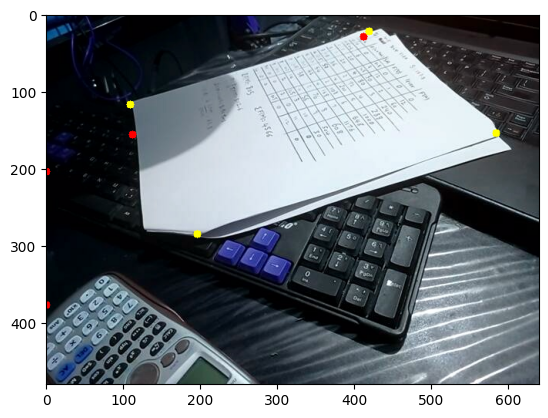

In [12]:
single_img=cv.imread('data/29.jpg')
pred=model.predict(np.array([single_img])/255)

numbers = np.arange(len(pred))
pred[numbers % 2 == 0] *= w  # normalize x
pred[numbers % 2 != 0] *= h  # normalize y
real=data["data/29.jpg"]
print('real',real)
print(pred[0].reshape(4,2))
pred=pred[0].reshape(4,2)
for corner,r in zip(pred,real):
    
    cv.circle(single_img,np.uint16(corner).tolist(),5,(255,0,0),-1)
    cv.circle(single_img,np.uint16(r).tolist(),5,(255,255,0),-1)
plt.imshow(single_img)
 

In [1]:
from ultralytics import YOLO
import cv2 as cv
import numpy as np

In [ ]:


# Load your segmentation model
model = YOLO("seg.pt")  # <-- Your trained model

# Load the image
image_path = "data/images/1.jpg"
image = cv.imread(image_path)

# Run inference
results = model(image, conf=0.1)  # Lower conf threshold to see masks

# Initialize an empty mask
net_mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Loop over detections
for result in results:
    if result.masks is not None:
        masks = result.masks.data.cpu().numpy()  # [N, H, W]
        for i, mask in enumerate(masks):
            binary_mask = (mask * 255).astype(np.uint8)
            net_mask = cv.bitwise_or(net_mask, binary_mask)  # Combine masks

cv.imshow("net",net_mask)
image=cv.bitwise_and(image,image,mask=net_mask)
cv.imshow("imf",image)

cv.waitKey(0)
cv.destroyAllWindows()



0: 480x640 1 documents, 3568.3ms
Speed: 4.6ms preprocess, 3568.3ms inference, 45.8ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:

# Load the YOLO model
model = YOLO("bounding_box.pt")  # Replace "best.pt" with your trained YOLO model file

# Load the image
image_path = "data/images/25.jpg"
image = cv.imread(image_path)

# Run inference
results = model(image)

# Draw bounding boxes on the image
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding box coordinates
    confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores
    classes = result.boxes.cls.cpu().numpy()  # Get class IDs

    for box, confidence, cls in zip(boxes, confidences, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {int(cls)}: {confidence:.2f}"
        cv.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle
        cv.putText(image, label, (x1, y1 - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Add label

# Display the image with bounding boxes
cv.imshow("YOLO Bounding Boxes", image)
cv.waitKey(0)
cv.destroyAllWindows()


0: 480x640 1 documents, 2145.3ms
Speed: 9.8ms preprocess, 2145.3ms inference, 5.9ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
model=YOLO("yolov8s.pt")
model.train(data="train/data.yaml",epochs=250,batch=5,pretrained=True)
results=model.val()

100%|██████████| 21.5M/21.5M [00:10<00:00, 2.19MB/s]


New https://pypi.org/project/ultralytics/8.3.137 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.136 🚀 Python-3.8.10 torch-2.4.1+cu121 CPU (Intel Core(TM) i7-4600M 2.90GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=5, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=train/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, o

train: Scanning /home/lord_ahmed/programming/handboard_whiteboard/train/train/labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 80.1±51.3 MB/s, size: 35.5 KB)



val: Scanning /home/lord_ahmed/programming/handboard_whiteboard/train/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250         0G     0.5764      3.728      1.205         14        640:   6%|▋         | 2/32 [00:35<08:59, 17.98s/it]


KeyboardInterrupt: 